In [1]:
import sqlalchemy
import pandas as pd
from components.charts import heatmap_chart
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
engine = sqlalchemy.create_engine('sqlite:///stock_etf.db')

In [3]:
data = pd.read_sql_query(
    "SELECT * FROM stockData", engine, parse_dates="Date")

In [4]:
portfolio_ratios = pd.DataFrame({
    'CSCO/AES': (data["CSCO"]/data["AES"]),
    'AFL/PPBI': (data["AFL"]/data["PPBI"]),
    'BRO/EXR': (data["BRO"]/data["EXR"]),
    'CDNS/BURL': (data["CDNS"]/data["BURL"]),
    'GNTX/AX': (data["GNTX"]/data["AX"]),
    'RAMP/AEE': (data["RAMP"]/data["AEE"]),
    'AAPL/MSFT': (data["AAPL"]/data["MSFT"])
})

In [27]:
portfolio_C_C_returns = ((portfolio_ratios - portfolio_ratios.shift(1)) / portfolio_ratios.shift(1))*100

In [32]:
def DOR (pair): 
    pairs = pair.split()
    descriptive_statistics = pd.DataFrame()
    
    for p in pairs:
    
        pair_statistics = pd.DataFrame({
        p: {'Mean' : portfolio_C_C_returns[p].mean(),
            'Variance' : portfolio_C_C_returns[p].var(),
            'Std' : portfolio_C_C_returns[p].std(),
            'Skew' : portfolio_C_C_returns[p].skew(),
            'Kurtosis' : portfolio_C_C_returns[p].kurtosis(),
            'Min' : portfolio_C_C_returns[p].min(),
            'Max' : portfolio_C_C_returns[p].max()},
        })
        
        descriptive_statistics = pd.concat([descriptive_statistics, pair_statistics], axis=1)
        
    return descriptive_statistics

In [33]:
DOR('CSCO/AES   AFL/PPBI   BRO/EXR   CDNS/BURL   GNTX/AX   RAMP/AEE')

,CSCO/AES,AFL/PPBI,BRO/EXR,CDNS/BURL,GNTX/AX,RAMP/AEE,AAPL/MSFT
Mean,0.036764,0.045204,0.039280,0.094714,0.027252,0.039281,-0.002277
Variance,4.626503,3.979333,2.970316,7.414282,7.227730,8.486187,1.940412
Std,2.150931,1.994826,1.723461,2.722918,2.688444,2.913106,1.392987
Skew,0.734727,0.627474,-0.409642,-0.014913,2.071116,0.658628,0.351829
Kurtosis,15.343701,11.883240,8.930939,9.800589,33.568968,10.072978,6.412446
Min,-15.544905,-11.682529,-16.870425,-19.749577,-16.007727,-21.808032,-9.059874
Max,26.411898,22.131202,9.974450,24.556737,42.943512,23.381846,9.874780


,CSCO/AES
Mean,0.036764
Variance,4.626503
Std,2.150931
Skew,0.734727
Kurtosis,15.343701
Min,-15.544905
Max,26.411898


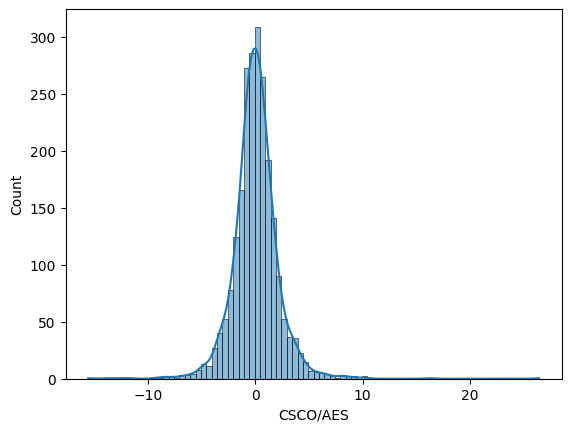

In [47]:
sns.histplot(data=portfolio_C_C_returns['CSCO/AES'], binwidth=0.5, kde=True)
DOR('CSCO/AES')

,AFL/PPBI
Mean,0.045204
Variance,3.979333
Std,1.994826
Skew,0.627474
Kurtosis,11.883240
Min,-11.682529
Max,22.131202


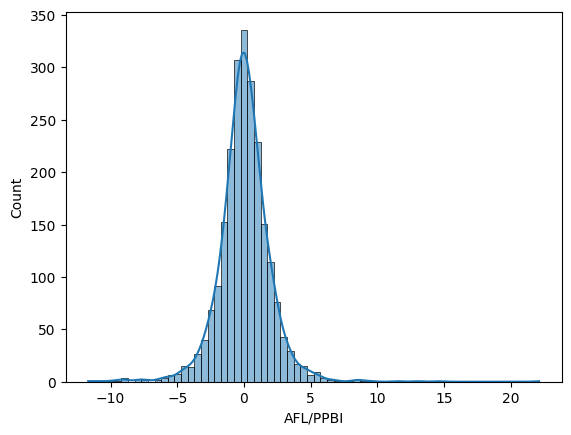

In [45]:
sns.histplot(data=portfolio_C_C_returns['AFL/PPBI'], binwidth=0.5, kde=True)
DOR('AFL/PPBI')

,BRO/EXR
Mean,0.039280
Variance,2.970316
Std,1.723461
Skew,-0.409642
Kurtosis,8.930939
Min,-16.870425
Max,9.974450


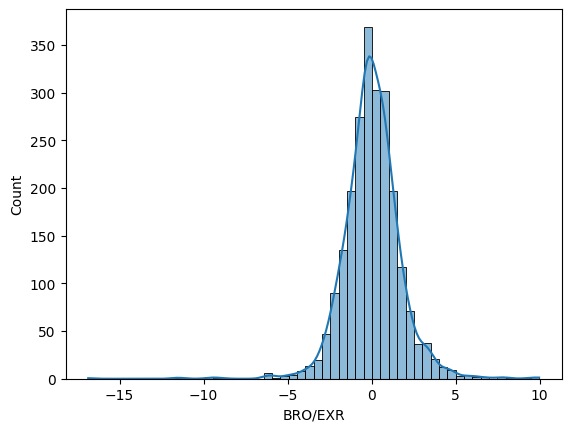

In [44]:
sns.histplot(data=portfolio_C_C_returns['BRO/EXR'], binwidth=0.5, kde=True)
DOR('BRO/EXR')

,CDNS/BURL
Mean,0.094714
Variance,7.414282
Std,2.722918
Skew,-0.014913
Kurtosis,9.800589
Min,-19.749577
Max,24.556737


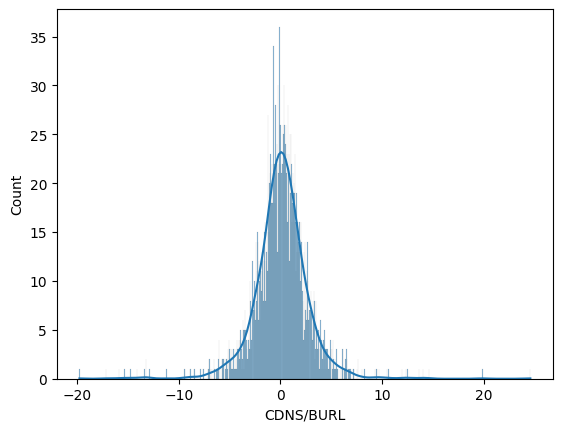

In [38]:
sns.histplot(data=portfolio_C_C_returns['CDNS/BURL'], binwidth=0.5, kde=True)
DOR('CDNS/BURL')

,RAMP/AEE
Mean,0.039281
Variance,8.486187
Std,2.913106
Skew,0.658628
Kurtosis,10.072978
Min,-21.808032
Max,23.381846


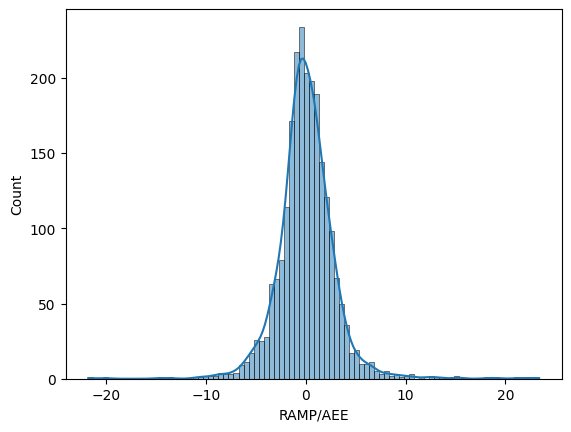

In [42]:
sns.histplot(data=portfolio_C_C_returns['RAMP/AEE'], binwidth=0.5, kde=True)
DOR('RAMP/AEE')

,GNTX/AX
Mean,0.027252
Variance,7.227730
Std,2.688444
Skew,2.071116
Kurtosis,33.568968
Min,-16.007727
Max,42.943512


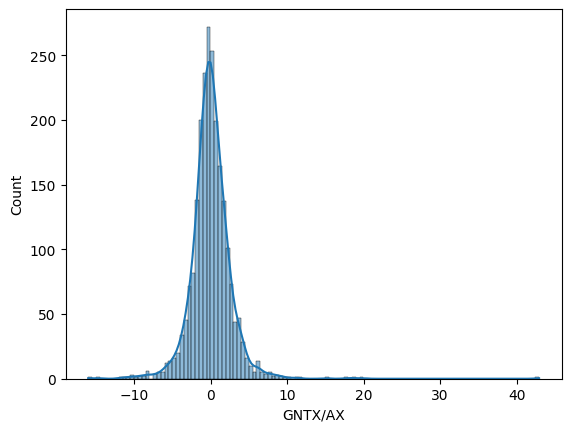

In [43]:
sns.histplot(data=portfolio_C_C_returns['GNTX/AX'], binwidth=0.5, kde=True)
DOR('GNTX/AX')

In [15]:
corr_check = portfolio_ratios.corr(method='spearman').round(2)

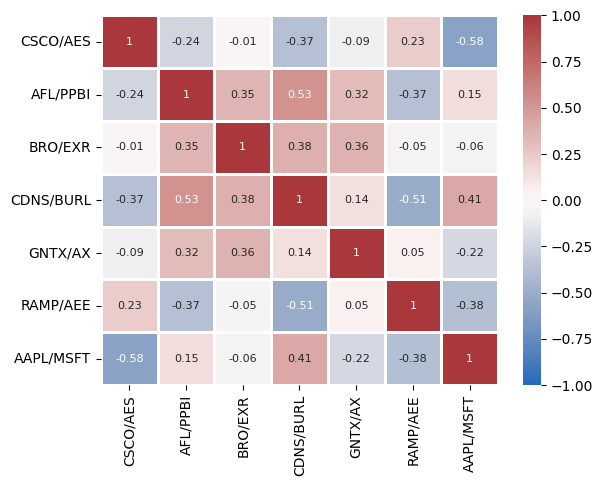

In [16]:
heatmap_chart(corr_check)

In [17]:
corr_check

,CSCO/AES,AFL/PPBI,BRO/EXR,CDNS/BURL,GNTX/AX,RAMP/AEE,AAPL/MSFT
CSCO/AES,1.00,-0.24,-0.01,-0.37,-0.09,0.23,-0.58
AFL/PPBI,-0.24,1.00,0.35,0.53,0.32,-0.37,0.15
BRO/EXR,-0.01,0.35,1.00,0.38,0.36,-0.05,-0.06
CDNS/BURL,-0.37,0.53,0.38,1.00,0.14,-0.51,0.41
GNTX/AX,-0.09,0.32,0.36,0.14,1.00,0.05,-0.22
RAMP/AEE,0.23,-0.37,-0.05,-0.51,0.05,1.00,-0.38
AAPL/MSFT,-0.58,0.15,-0.06,0.41,-0.22,-0.38,1.00
